# POLYNOMIAL LINEAR REGRESSION 

```julia
versioninfo() # -> v"1.11.1"
```

In [13]:
cd(@__DIR__)

In [14]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [15]:
using CSV, DataFrames
using Plots
using MLJ

Read data from file

In [16]:
df = CSV.read("../../Datasets/Position_Salaries.csv", DataFrame)
schema(df)

┌──────────┬──────────┬──────────┐
│ names    │ scitypes │ types    │
├──────────┼──────────┼──────────┤
│ Position │ Textual  │ String31 │
│ Level    │ Count    │ Int64    │
│ Salary   │ Count    │ Int64    │
└──────────┴──────────┴──────────┘


Unpack data

In [17]:
x = select(df, :Level)
n = 4
X = zeros(size(x)[1], n) # length(x.Level)
y = df.Salary

10-element Vector{Int64}:
   45000
   50000
   60000
   80000
  110000
  150000
  200000
  300000
  500000
 1000000

Partition of data

In [18]:
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=123)
Xtrain, Xtest = X[train, :], X[test, :]
ytrain, ytest = y[train], y[test]

([300000, 45000, 1000000, 150000, 500000, 80000, 110000, 200000], [60000, 50000])

Load linear regression model

In [19]:
LR = @load LinearRegressor pkg=MLJLinearModels
lr_ = LR()

import MLJLinearModels ✔


[ Info: For silent loading, specify `verbosity=0`. 


LinearRegressor(
  fit_intercept = true, 
  solver = nothing)

Add extra features & scaling

In [20]:
sc_ = Standardizer()
for i in 1:n
    sc = machine(sc_, x.Level[train].^i) |> fit!
    Xtrain[:, i] = MLJ.transform(sc, x.Level[train].^i)
    Xtest[:, i] = MLJ.transform(sc, x.Level[test].^i)
end

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJModels.Standardizer` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Union{Table, AbstractVector{<:Continuous}}}
└ @ MLJBase ~/.julia/packages/MLJBase/7nGJF/src/machines.jl:237
[ Info: Training machine(Standardizer(features = Symbol[], …), …).
┌ Warning: The number and/or types of data argume

Train & fit the regression model

In [21]:
lr = machine(lr_, table(Xtrain), ytrain) |> fit!
params = fitted_params(lr)

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc MLJLinearModels.LinearRegressor` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{AbstractVector{Continuous}}, AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{Continuous}}
└ @ MLJBase ~/.julia/packages/MLJBase/7nGJF/src/machines.jl:237
[ Info: Training machine(LinearRegressor(fit_inte

(coefs = [:x1 => -1.1392665965514872e6, :x2 => 5.299079116946298e6, :x3 => -8.209767142502097e6, :x4 => 4.359095014602792e6],
 intercept = 298124.99999999977,)

Predict & measure the error

In [22]:
yhat = predict(lr, table(Xtest))
println("Error is $(sum(( yhat.- ytest ).^2) ./ length(ytest) )")

Error is 3.49980211432512e9


Plot & compare

In [23]:
using LaTeXStrings

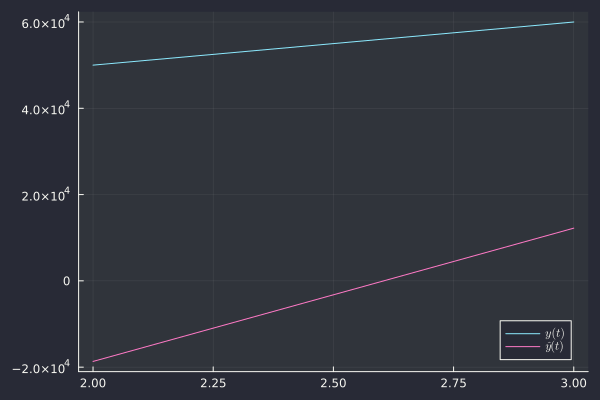

In [24]:
plot(x.Level[test], ytest, label=L"y(t)")
plot!(x.Level[test], yhat, label=L"\hat{y}(t)")